## Hyperparameter Tuning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
income = pd.read_csv('../Data/income.csv')

In [3]:
from sklearn.model_selection import train_test_split

def income_model_data_prep(data):
    data = pd.get_dummies(
        income.assign(
                target = np.where(data["SalStat"]==" less than or equal to 50,000", 0,1),
                nativecountry = data["nativecountry"].str.replace(" Holand-Netherlands",
                                                         " Germany"),
                JobType = data["JobType"].replace({" Never-worked":" Without-pay"}),
                occupation = data["occupation"].str.replace(" Armed-Forces"," ?")
                ).drop("SalStat",axis=1),
        drop_first=True
    )
    X = data.drop(columns=["target"],axis=1)
    y = data["target"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

    return X_train, X_test, y_train, y_test

In [4]:
X_train, X_test, y_train, y_test = income_model_data_prep(income)

In [6]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy',max_depth=None, min_samples_leaf=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [7]:
print(f'Train Accuracy: {dt.score(X_train, y_train)}')
print(f'Test Accuracy: {dt.score(X_test, y_test)}')

Train Accuracy: 0.9793995778281605
Test Accuracy: 0.8147279549718575


In [8]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, dt.predict(X_test))

array([[4271,  581],
       [ 604,  940]])

In [9]:
from sklearn.model_selection import GridSearchCV

In [16]:
params={
    "max_depth": [2, 5, 10, 20],
    "min_samples_leaf": [2, 5, 10, 20],
    "criterion": ['entropy','gini','log_loss']
}
gridsearch = GridSearchCV(DecisionTreeClassifier(),param_grid=params,cv=5)
gridsearch.fit(X_train, y_train)

gridsearch.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5}

In [17]:
gridsearch.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5)

In [18]:
dt_tuned = DecisionTreeClassifier(**gridsearch.best_params_)

dt_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5)

In [19]:
confusion_matrix(y_test, dt_tuned.predict(X_test))

array([[4603,  249],
       [ 653,  891]])

In [21]:
print(f'Train Accuracy: {dt_tuned.score(X_train, y_train)}')
print(f'Test Accuracy: {dt_tuned.score(X_test, y_test)}')

Train Accuracy: 0.865647721053866
Test Accuracy: 0.8589743589743589


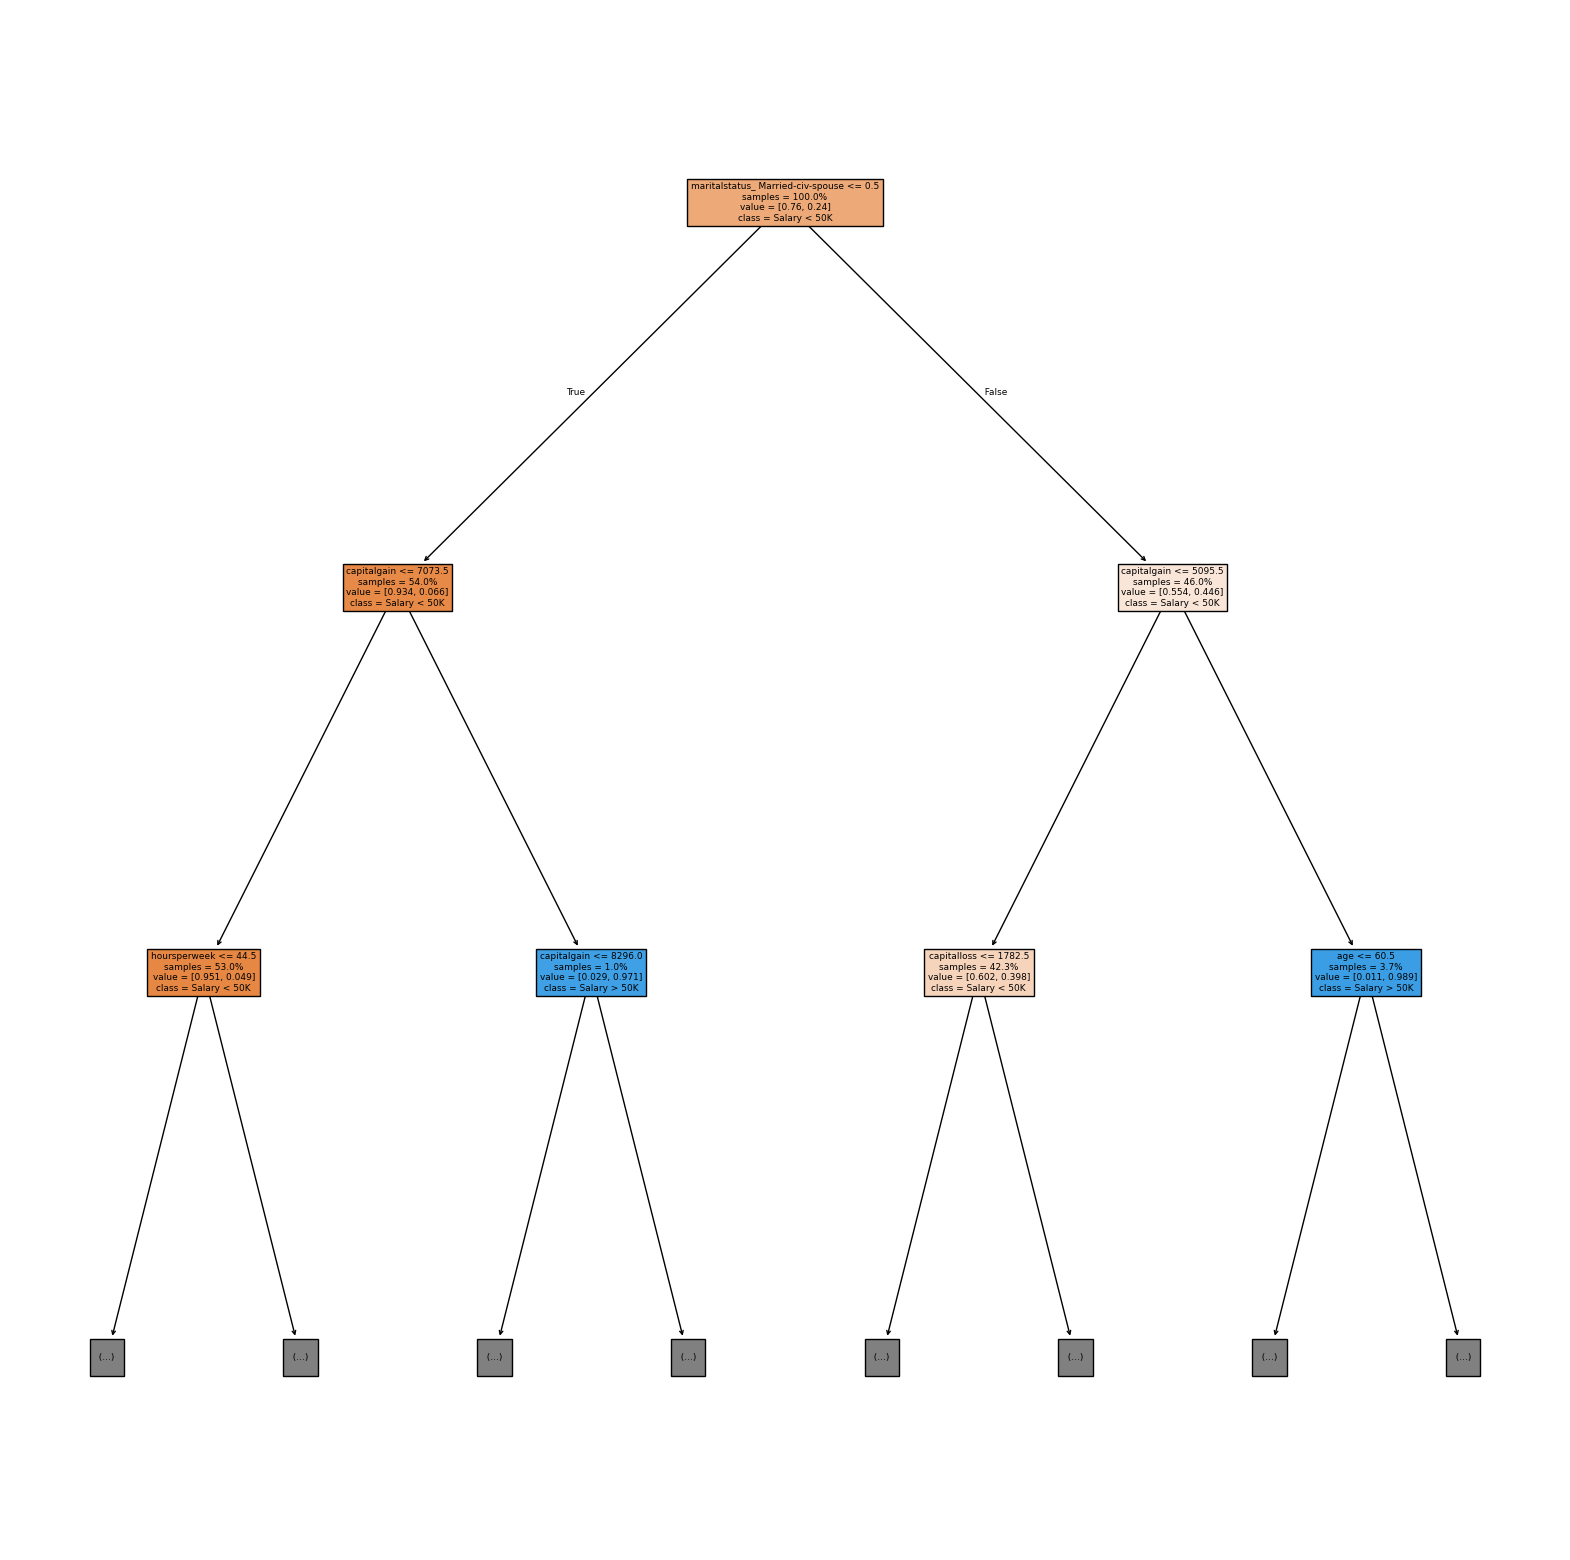

In [25]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(20,20))

plot_tree(
            dt_tuned,
            feature_names=list(X_test.columns),
            class_names=["Salary < 50K", "Salary > 50K"],
            impurity=False,
            proportion=True,
            filled=True,
            max_depth=2
);